In [48]:
colmiHeartRatesWalking = ['1747774479,75','1747774352,102','1747774111,77','1747773991,93','1747773846,93','1747773715,85','1747773715,85','1747773518,85','1747773457,88','1747773457,88','1747773457,88','1747773457,88','1747773456,88','1747773456,88','1747773456,88','1747773456,88','1747773455,88','1747773455,88','1747773455,88','1747773454,88','1747773324,107','1747773196,96','1747773073,91','1747772948,82','1747772827,85','1747772826,85','1747772688,105','1747772566,103','1747772446,105','1747772326,80','1747772207,77','1747772206,76','1747772086,96','1747771966,98','1747771846,69','1747771316,77','1747771185,97','1747771059,93','1747770924,84','1747770797,110','1747770796,110','1747770663,102','1747770662,101','1747770537,81','1747770417,81','1747770297,84','1747770163,100','1747770162,100','1747770026,109','1747769893,104','1747769773,82','1747769653,100','1747769533,92','1747768942,82','1747768807,71','1747768687,79','1747768687,78']
huaweiHeartRatesWalking = ['1747769160,95','1747769280,85','1747769460,85','1747769520,89','1747769580,93','1747769820,97','1747770120,85','1747770180,78','1747770240,79','1747770480,114','1747770540,112','1747770720,83','1747770780,102','1747770840,79','1747771020,100','1747771320,89','1747771500,85','1747771620,95','1747771680,84','1747771860,98','1747772460,92','1747772520,103','1747772580,94','1747773060,98','1747773120,103','1747773240,95','1747773360,91','1747773480,105','1747773660,97','1747774080,106','1747774260,96','1747774320,98','1747774380,101']
huaweiHeartRatesResting = ['1747782900,85','1747783140,84','1747783200,77','1747783260,73','1747783320,92','1747783500,86','1747783620,81','1747783800,84','1747783860,85','1747783980,80','1747784100,80','1747784460,80','1747784700,75','1747784820,80','1747784880,87','1747784940,80','1747785060,79','1747785120,78','1747785420,77','1747785480,71','1747785540,73','1747785660,76','1747785720,74','1747785780,78','1747785960,79','1747786080,78','1747786140,82','1747786260,76','1747786440,75','1747786680,79','1747786740,77']
colmiHeartRatesResting = ['1747786620,78','1747786561,79','1747786501,80','1747786441,77','1747786380,73','1747786321,76','1747786261,78','1747786202,78','1747786143,78','1747786097,81','1747786049,85','1747785316,83','1747784579,79','1747784521,80','1747784462,81','1747784401,82','1747784339,81','1747784281,81','1747784222,81','1747784161,81','1747784099,81','1747784041,82','1747783982,81','1747783921,84','1747783859,89','1747783801,84','1747783742,80','1747783681,82','1747783619,84','1747783561,84','1747783502,84','1747783444,87','1747783385,90','1747783324,86','1747783258,81','1747783207,77','1747783022,83','1747782961,84','1747782899,85']

TestimgMetaData = {'timestamp': '1747831763',
 'delete_url': 'https://ibb.co/5X7CkvQp/1a58c141ffff304f9895340196554cf8',
 'url': 'https://i.ibb.co/LDGBr6Tj/2fb51ca0f210.jpg'}

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
from PIL import Image,ImageOps,ImageDraw,ImageFont
from datetime import datetime
import io

res = (1920,1080)
Rf = ImageFont.truetype('Roboto-Bold.ttf', int(0.02*res[0]))

def convertRawRedisToDF(mesurement_list,label="mesurement"):
    x = []
    y = []
    for mesurement in mesurement_list:
        x.append(datetime.fromtimestamp(int(mesurement.split(",")[0])))
        y.append(int(mesurement.split(",")[1]))
    df = pd.DataFrame({'datetime': x,label: y,})
    return df

def GenerateFrame(Titlefont = Rf, stepsData = None,heartRateData = None,Title = "IRL Stream" ,photo = None, resolution = res, bg_color = (16, 17, 24)):
    outputimg = Image.new("RGBA", resolution, bg_color)
    photores = (1280,720)
    if photo == None:
        photo = Image.new("RGBA", photores, (0, 0, 0))
    pastepos = (int(photores[0]*0.078),int(photores[1]*0.1389))
    outputimg.paste(photo, pastepos, photo)
    draw = ImageDraw.Draw(outputimg)
    titlePos = (int(resolution[0]*0.5)-(len(Title)*10),int(resolution[1]*0.02))
    draw.text(titlePos, Title, fill=(255, 255, 255),stroke_width=1, stroke_fill=(0, 0, 0), font=Titlefont)
                            
    if not heartRateData is None:
        df_hr = convertRawRedisToDF(heartRateData,label="Heartrate")
        hrplot = GenerateMiniPlot(df_hr,dataMaxVal = 40,dataMinVal = 130,title="Heartrate")
        pastepos = (int(resolution[0]*0.7448),int(resolution[1]*0.08))
        outputimg.paste(hrplot, pastepos, hrplot)

    if not stepsData is None:
        df_st = convertRawRedisToDF(stepsData,label="Steps")
        stplot = GenerateMiniPlot(df_st,dataMaxVal = 40,dataMinVal = 130,title= "Steps")
        pastepos = (int(resolution[0]*0.7448),int(resolution[1]*0.45))
        outputimg.paste(stplot, pastepos, stplot)
        
    return outputimg

def GenerateMiniPlot(df_data,dataMaxVal = 40,dataMinVal = 130,title="Mesurement"):
    textcolor = (0.9,0.9,0.9)
    fig = plt.figure(figsize=(5, 3))
    sns.set_style("darkgrid", {"axes.edgecolor":".9","grid.color": ".9","axes.facecolor": (63/255, 65/255, 85/255)})
    df_keys = df_data.keys()
    ax = sns.lineplot(data=df_data,color='black', x=df_keys[0], y=df_keys[1])
    ax.tick_params(axis='x', rotation=-45,labelcolor=textcolor)
    ax.tick_params(axis='y',labelcolor=textcolor)
    ax.set_title(title, color=textcolor)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    if (not dataMaxVal is None) and (not dataMinVal is None) > 0:
        plt.ylim(dataMaxVal, dataMinVal)
    byio = io.BytesIO()
    fig.patch.set_alpha(0)
    plt.savefig(byio, format="png",bbox_inches='tight')
    plt.close(fig)
    img = Image.open(byio).convert("RGBA")
    return img
    
def downloadImgbb(imgJson,saveToStreamLogs = True,finalimgsize=(1280,720)): # (1280,720)
    response = requests.get(imgJson['url'])
    outputimg = Image.new("RGBA", finalimgsize, (0, 0, 0))
    if response.status_code == 200:
        outcenter = (finalimgsize[0]/2,finalimgsize[1]/2)
        img = Image.open(io.BytesIO(response.content)).convert("RGBA")
        img = ImageOps.contain(img,finalimgsize)
        imgcenter = (img.size[0]/2,img.size[1]/2)
        pastepos = (int(outcenter[0]-imgcenter[0]),int(outcenter[1]-imgcenter[1]))
        outputimg.paste(img, pastepos, img)
        draw = ImageDraw.Draw(outputimg)
        fontsize = int(finalimgsize[0]*0.015)
        Rf = ImageFont.truetype('Roboto-Bold.ttf', fontsize)
        dt_obj = datetime.fromtimestamp(int(imgJson['timestamp']))
        format_string = "%d-%m-%Y %H:%M:%S"
        dt_str = dt_obj.strftime(format_string)
        txtpos = (finalimgsize[0]-int(finalimgsize[0]*0.15625),finalimgsize[1]-int(finalimgsize[1]*0.04630))
        draw.text(txtpos, dt_str, fill=(255, 255, 255),stroke_width=1, stroke_fill=(0, 0, 0), font=Rf)
    return outputimg

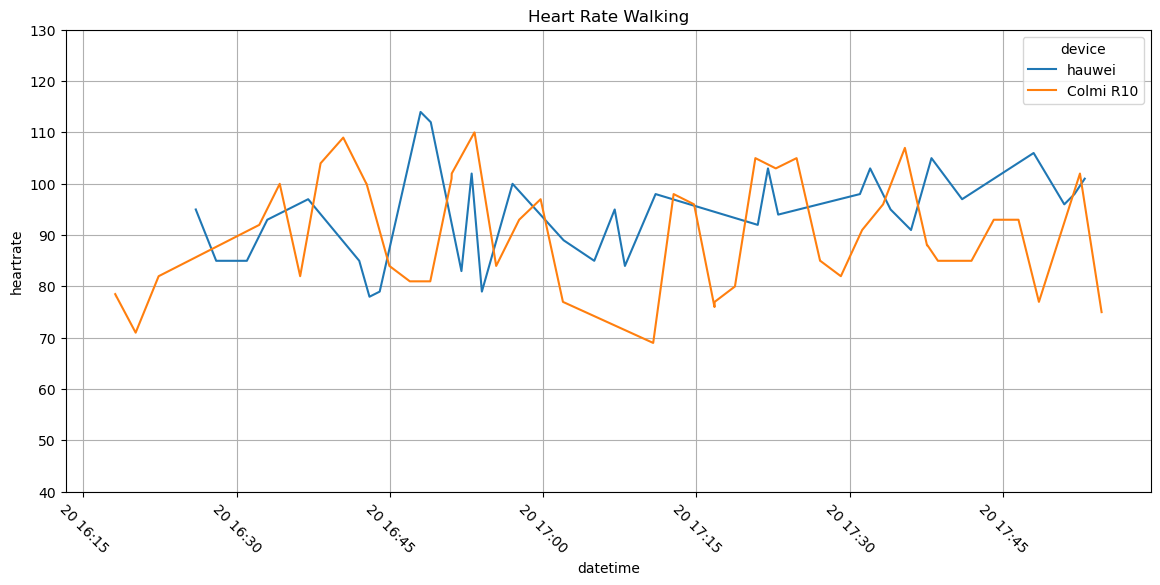

In [42]:
df_colmi = convertRawRedisToDF(colmiHeartRatesWalking,label="heartrate")
df_colmi['device'] = 'Colmi R10'
df_huawei = convertRawRedisToDF(huaweiHeartRatesWalking,label="heartrate")
df_huawei['device'] = 'hauwei' 
df_concatenated = pd.concat([df_huawei, df_colmi], axis=0)

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df_concatenated, x="datetime", y="heartrate", hue="device")
ax.tick_params(axis='x', rotation=-45)
ax.set_title('Heart Rate Walking')
plt.ylim(40, 130)
plt.grid()  #just add this
plt.show()

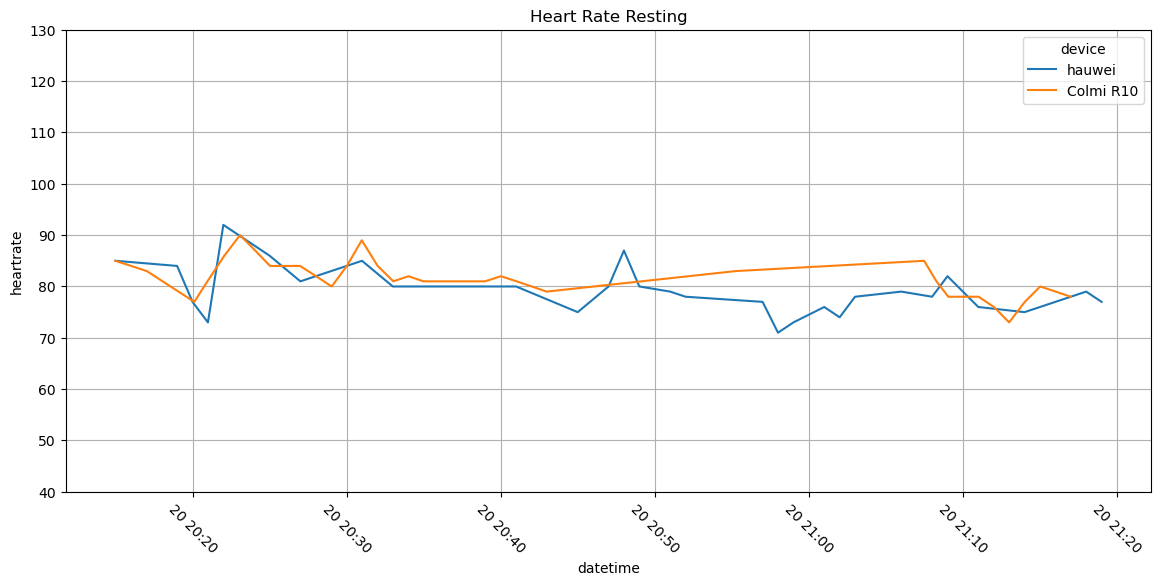

In [47]:
df_colmi = convertRawRedisToDF(colmiHeartRatesResting,label="heartrate")
df_colmi['device'] = 'Colmi R10'
df_huawei = convertRawRedisToDF(huaweiHeartRatesResting,label="heartrate")
df_huawei['device'] = 'hauwei' 
df_concatenated = pd.concat([df_huawei, df_colmi], axis=0)

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df_concatenated, x="datetime", y="heartrate", hue="device")
ax.tick_params(axis='x', rotation=-45)
ax.set_title('Heart Rate Resting')
plt.ylim(40, 130)
plt.grid()  #just add this
plt.show()

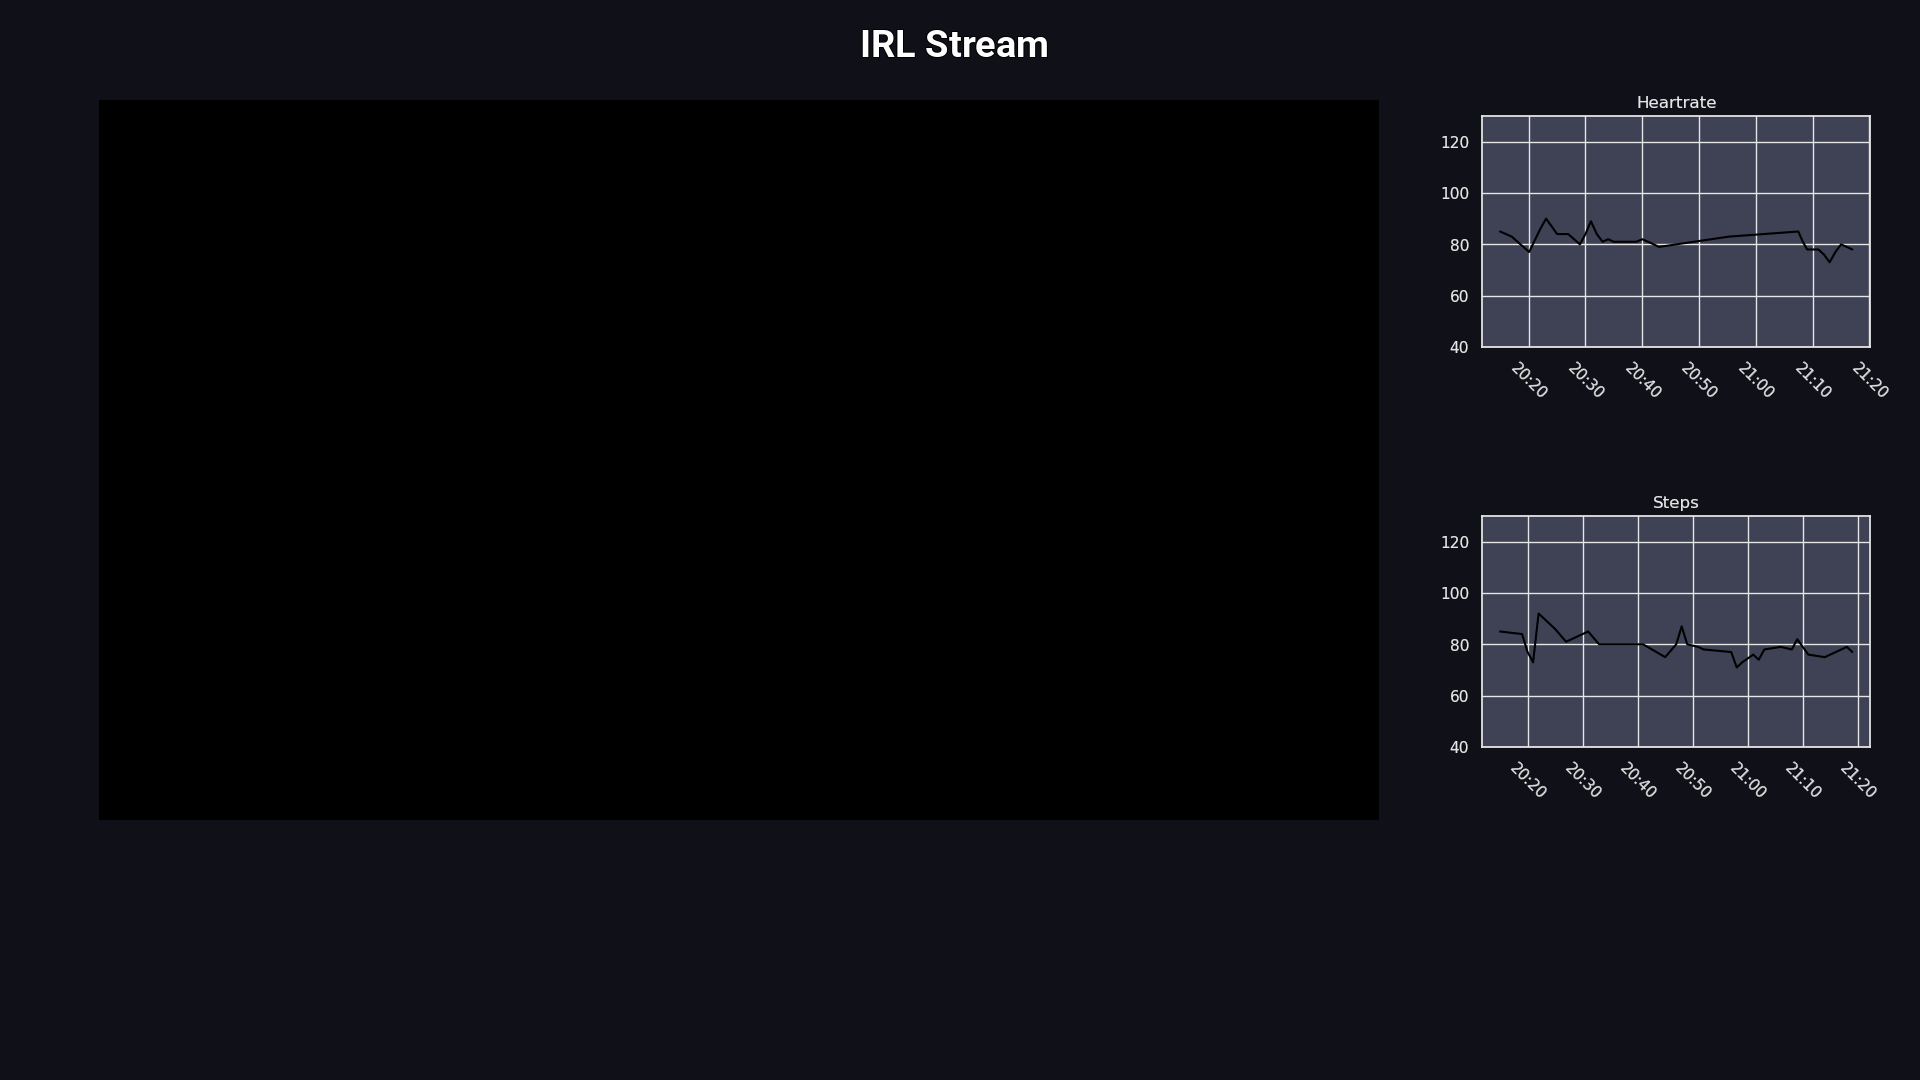

In [207]:
im = GenerateFrame(heartRateData=colmiHeartRatesResting,stepsData=huaweiHeartRatesResting)
im

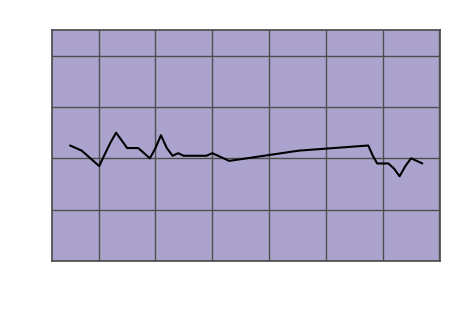

In [159]:
df_colmi = convertRawRedisToDF(colmiHeartRatesResting,label="heartrate")

plt.figure(figsize=(5, 3))
#sns.set_theme(style="darkgrid", palette=None)
sns.set_style("darkgrid", { 
'axes.labelcolor': 'white',
"axes.edgecolor":".3",
"grid.color": ".3",
"axes.facecolor": 
sns.color_palette(palette='PuOr')[4]})

ax = sns.lineplot(data=df_colmi,color='black', x="datetime", y="heartrate")
ax.tick_params(axis='x', rotation=-45,labelcolor='white')
ax.tick_params(axis='y',labelcolor='white')
ax.set_title('Heart Rate', color='white')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylim(40, 130)
plt.show()

In [75]:
df_colmihr != None

,datetime,heartrate
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True
